<a href="https://colab.research.google.com/github/andreatussaz/analisi_radiologia/blob/main/analisi_radiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Estadístiques bàsiques ---
                             DataHora              Modalitat  TempsEspera  \
count                            1000                   1000  1000.000000   
unique                            NaN                      7          NaN   
top                               NaN  Ressonància Magnètica          NaN   
freq                              NaN                    163          NaN   
mean    2025-08-17 01:39:06.000000256                    NaN    25.453287   
min               2025-08-01 08:18:00                    NaN     1.000000   
25%               2025-08-09 08:17:00                    NaN    15.164667   
50%               2025-08-17 12:18:30                    NaN    24.401276   
75%               2025-08-24 21:07:00                    NaN    34.395495   
max               2025-08-31 22:35:00                    NaN    62.782487   
std                               NaN                    NaN    12.633992   

               Edat  Sexe    ServeiSolicita

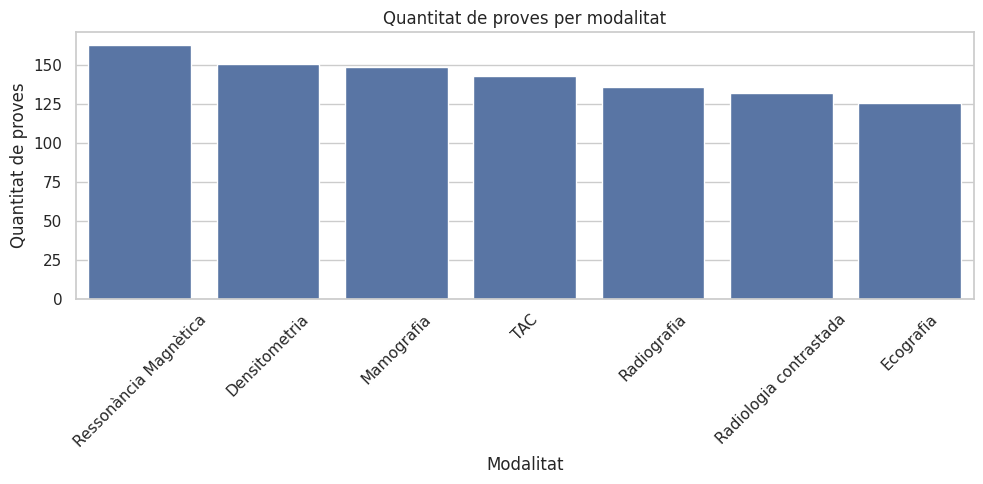

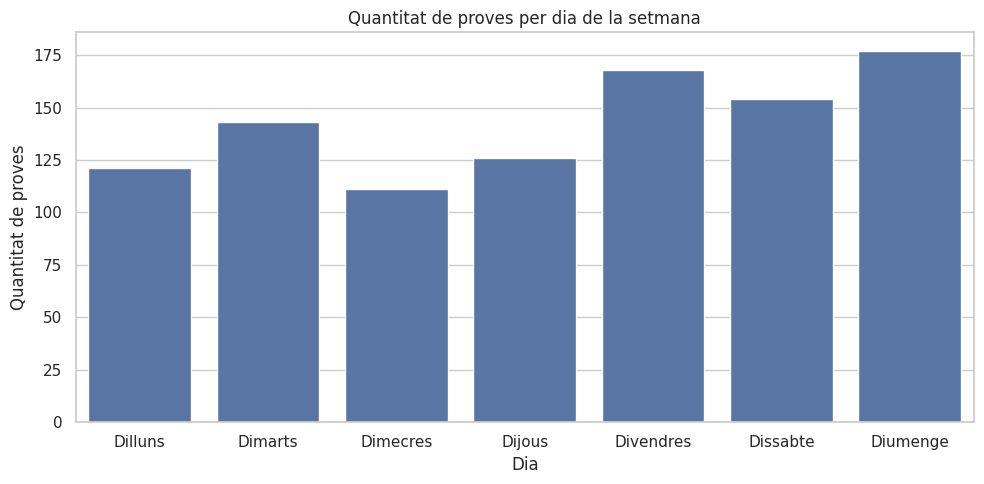

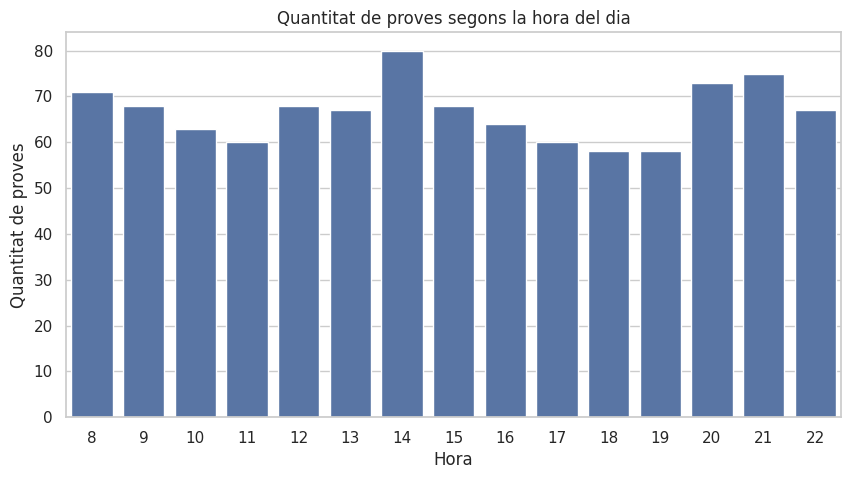

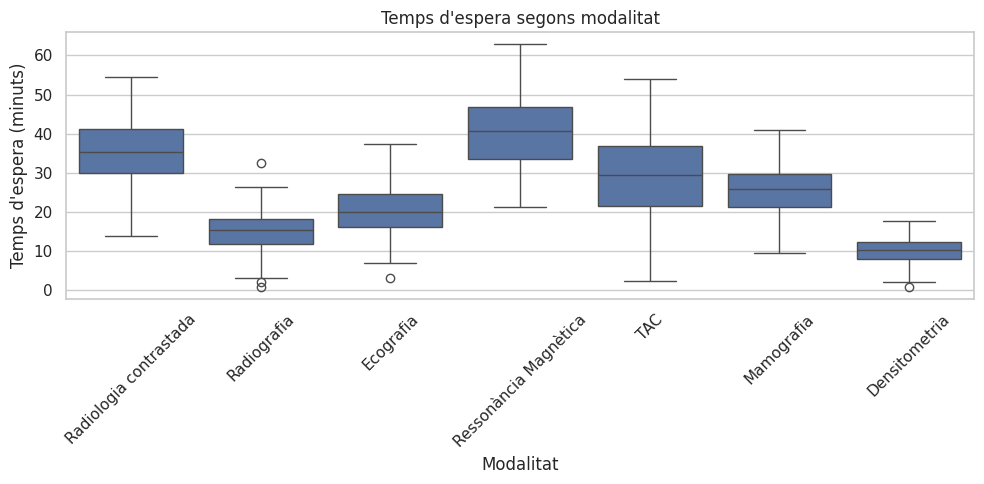

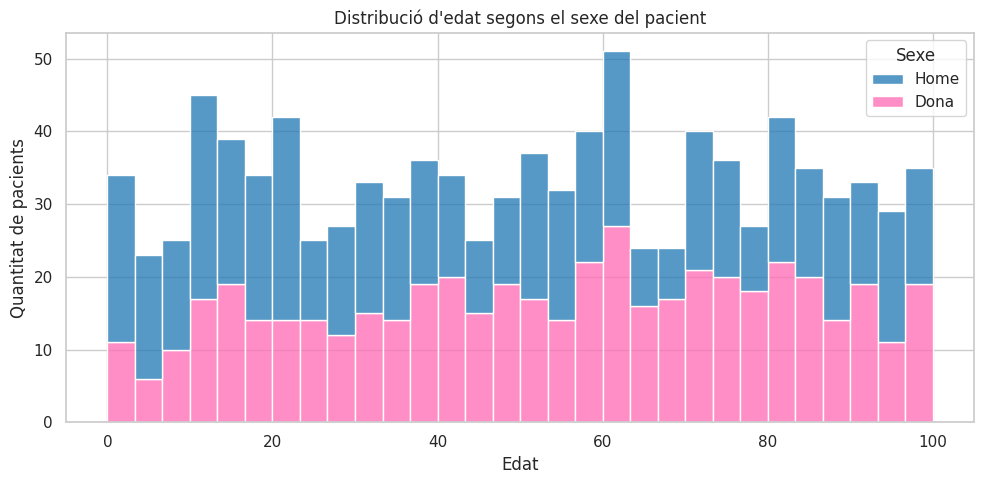

/tmp/ipython-input-3748998366.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ServeiSolicitant', order=df['ServeiSolicitant'].value_counts().index, palette='Set2')


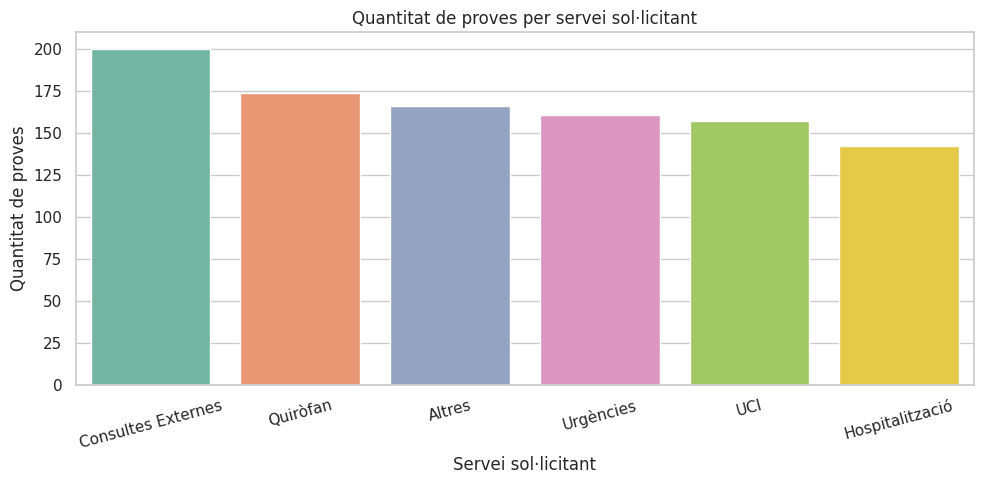


Conclusions bàsiques:
- La modalitat més realitzada és Ressonància Magnètica.
- El dia amb més proves és Diumenge.
- L'hora amb més proves és 14:00.
- El temps d'espera mitjà per modalitat és:
Modalitat
Densitometria             10.17
Ecografia                 20.40
Mamografia                25.54
Radiografia               14.94
Radiologia contrastada    35.45
Ressonància Magnètica     40.30
TAC                       29.80
Name: TempsEspera, dtype: float64


In [7]:
# Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Simulem les dades fictícies
np.random.seed(42)  # Aquesta funció farà que generi dades aleatories però que sempre ens dongui el mateix resultat

n = 1000  # Nombres totals dels registres

# Especifiquem les dates i les hores
start_date = datetime(2025, 8, 1) # Començarà a fer l'anàlisi l'1 d'agost del 2025
dates = [start_date + timedelta(days=np.random.randint(0, 31), # Aquesta funció ens donarà unes dates aleatòries amb les condicions de les hores, minuts i dies especificats
                                hours=np.random.randint(8, 23),
                                minutes=np.random.randint(0, 60)) for _ in range(n)] # Acabo fent un bucle per crear les 1000 dades aleatories entre les 8 i les 22h durant el mes d'agost.

# Modalitat de la prova radiològica
modalitats = ['Radiografia', 'TAC', 'Ecografia', 'Ressonància Magnètica', 'Mamografia', 'Densitometria', 'Radiologia contrastada'] # Llista de les proves radiològiques del servei
proves = np.random.choice(modalitats, size=n)  # Assigna de manera aleatòria una modalitat per pacient

# Temps d'espera per modalitat
esperes = [] # Per cada tipus de prova assignarem un temps d'espera aleatori
for p in proves:
    if p == 'Radiografia':
        esperes.append(np.random.normal(15, 5))
    elif p == 'TAC':
        esperes.append(np.random.normal(30, 10))
    elif p == 'Ecografia':
        esperes.append(np.random.normal(20, 7))
    elif p == 'Ressonància Magnètica':
        esperes.append(np.random.normal(40, 10))
    elif p == 'Mamografia':
        esperes.append(np.random.normal(25, 6))
    elif p == 'Densitometria':
        esperes.append(np.random.normal(10, 3))
    elif p == 'Radiologia contrastada':
        esperes.append(np.random.normal(35, 8))

esperes = np.clip(esperes, 1, None)  # Li diem que no ens dongui cap valor negatiu

# Edat dels pacients
edats = np.random.randint(0, 101, size=n) # Li diem que ens dongui una edat aleatòria per cada pacient que vagi dels 0 als 100 anys

# Sexe dels pacients
sexes = np.random.choice(['Home', 'Dona'], size=n) # Fa una tria aleatòria del sexe dels pacients

# Servei sol·licitant
serveis = ['Urgències', 'Consultes Externes', 'Hospitalització', 'UCI', 'Quiròfan', 'Altres']
servei_solicitant = np.random.choice(serveis, size=n)

# Fem el DataFrame
df = pd.DataFrame({
    'DataHora': dates,
    'Modalitat': proves,
    'TempsEspera': esperes,
    'Edat': edats,
    'Sexe': sexes,
    'ServeiSolicitant': servei_solicitant
})

# Fem l'anàlisi
print("\n--- Estadístiques bàsiques ---")
print(df.describe(include='all')) # Mostrem les estadístiques de totes les columnes

print("\n--- Quantitat de proves per modalitat ---")
print(df['Modalitat'].value_counts()) # Fem el recompte de la quantitat de proves per modalitat

print("\n--- Quantitat de proves per sexe ---")
print(df['Sexe'].value_counts()) # Fem el recompte de la quantitat de proves per sexe

print("\n--- Quantitat de proves per servei sol·licitant ---")
print(df['ServeiSolicitant'].value_counts())

# Faig la traducció dels dies de la setmana per a que es mostrin en català
traductor_dies_setmana = {
    'Monday': 'Dilluns',
    'Tuesday': 'Dimarts',
    'Wednesday': 'Dimecres',
    'Thursday': 'Dijous',
    'Friday': 'Divendres',
    'Saturday': 'Dissabte',
    'Sunday': 'Diumenge'
}

# Creem la columna per dia i hora
df['DiaSetmana'] = df['DataHora'].dt.day_name().map(traductor_dies_setmana)
df['Hora'] = df['DataHora'].dt.hour

# Mostrem els resultats amb una gràfica
sns.set(style="whitegrid")

# Gràfic de la quantitat de proves per modalitat
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Modalitat', order=df['Modalitat'].value_counts().index)
plt.title('Quantitat de proves per modalitat')
plt.xlabel('Modalitat')
plt.ylabel('Quantitat de proves')
plt.xticks(rotation=45)  # Poso les etiquetes de costat per a que no es superposin
plt.tight_layout()       # Poso el layout de manera que no es talli la paraula de les etiquetes
plt.show()

# Gràfic de la quantitat de proves per dia de la setmana
plt.figure(figsize=(10,5))
order_days = ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous', 'Divendres', 'Dissabte', 'Diumenge']
sns.countplot(data=df, x='DiaSetmana', order=order_days)
plt.title('Quantitat de proves per dia de la setmana')
plt.xlabel('Dia')
plt.ylabel('Quantitat de proves')
plt.tight_layout()
plt.show()

# Gràfic de la quantitat de proves segons la hora del dia
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Hora')
plt.title('Quantitat de proves segons la hora del dia')
plt.xlabel('Hora')
plt.ylabel('Quantitat de proves')
plt.show()

# Gràfic del temps d'espera segons modalitat (en minuts)
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Modalitat', y='TempsEspera')
plt.title('Temps d\'espera segons modalitat')
plt.xlabel('Modalitat')
plt.ylabel('Temps d\'espera (minuts)')
plt.xticks(rotation=45)  # Poso les etiquetes de costat per a que no es superposin
plt.tight_layout()       # Poso el layout de manera que no es talli la paraula de les etiquetes
plt.show()


# Gràfic de la distribució de l'edat segons el sexe del pacient
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Edat', hue='Sexe', multiple='stack', bins=30,  palette={'Home': '#1f77b4', 'Dona': '#ff69b4'})
plt.title('Distribució d\'edat segons el sexe del pacient')
plt.xlabel('Edat')
plt.ylabel('Quantitat de pacients')
plt.tight_layout()
plt.show()

# Gràfic de la quantitat de proves segons el servei sol·licitant
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='ServeiSolicitant', order=df['ServeiSolicitant'].value_counts().index, palette='Set2')
plt.title('Quantitat de proves per servei sol·licitant')
plt.xlabel('Servei sol·licitant')
plt.ylabel('Quantitat de proves')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Fem les conclusions
print("\nConclusions bàsiques:")
print(f"- La modalitat més realitzada és {df['Modalitat'].mode()[0]}.")
print(f"- El dia amb més proves és {df['DiaSetmana'].value_counts().idxmax()}.")
print(f"- L'hora amb més proves és {df['Hora'].value_counts().idxmax()}:00.")
print(f"- El temps d'espera mitjà per modalitat és:")
print(df.groupby('Modalitat')['TempsEspera'].mean().round(2))